In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



In [2]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

24.644820410078864 123.6273417077719
14.06739768589567 -88.88114299397553
13.163281323715864 76.13950345112369
-69.38867578532138 78.54903422967698
68.099180607524 53.82293931417212
9.590289800057363 159.3135418607675
26.19335124666658 -54.75982448582923
-43.197469000959565 -21.54416801166255
71.48971294647828 -123.51901386868929
-50.52686762563613 92.51302697198395
-0.06484255168409447 89.82148183072485
-8.831807858118168 -169.45917278963418
-30.777490977191853 21.725141499757513
44.00239151965576 104.40734777541854
-24.299728665518373 -6.33878093321789
-13.519823978254905 -24.275638189528536
-33.04776185511463 -149.80610658537265
-52.333755385128725 21.289349761296222
86.13377840041929 -16.023979687962594
14.910366330511522 48.54480110563347
19.800610601170646 145.898558230665
86.34612291219324 -68.37093543432431
-0.8771233657654705 -17.437523262543152
-13.022048356282909 -20.4818407020376
-36.00147020911181 -158.38033779746615
43.69702802162391 -18.648996808562686
-27.66213642907158

-37.754609905386644 82.87425016667817
44.57655060762531 -133.94948215954864
0.2089591831608857 -100.58503193056251
-60.589126925510655 105.33357691290115
-74.84237486306179 132.52734762565825
42.11361148724225 -42.41883608526214
28.429284494478168 139.79712021880522
13.09283356209464 113.14626859889302
42.592979746958605 133.6809755031387
-26.494004911693096 14.71708412645674
-17.659419146987105 133.46739262040535
82.77919752551409 49.72325336336465
-72.86046206282435 176.9098303695676
62.353550516319416 146.15955894952077
2.198889362262122 165.19024980569725
42.53519422124134 16.651753412580774
-0.7652273521127455 114.22142731912743
-18.765953439376204 -160.20481850877883
-69.27386598189578 -28.88253762046898
-44.790404098441314 -20.01565490741106
25.428675099789444 -95.88358970787155
52.27153715646696 54.03319974799041
-88.80171867110045 26.879678756186934
53.70642658879527 -53.92526926752983
-72.7356479031317 22.28194250410158
-76.69410363518301 -50.13727995985917
-24.28091932367957

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ishigaki
Processing Record 2 of Set 1 | chalatenango
Processing Record 3 of Set 1 | hassan
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | hovd
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | bosaso
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | qaanaaq
Processi

Processing Record 36 of Set 4 | aswan
Processing Record 37 of Set 4 | asfi
Processing Record 38 of Set 4 | belawan
Processing Record 39 of Set 4 | naftah
City not found. Skipping...
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | hudson bay
Processing Record 42 of Set 4 | tarakan
Processing Record 43 of Set 4 | tukrah
Processing Record 44 of Set 4 | maceio
Processing Record 45 of Set 4 | mouzakion
City not found. Skipping...
Processing Record 46 of Set 4 | polunochnoye
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | smoky lake
Processing Record 1 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 5 | khasan
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | gulshat
City not found. Skipping...
Processing Record 6 of Set 5 | p

Processing Record 23 of Set 8 | samarai
Processing Record 24 of Set 8 | musoma
Processing Record 25 of Set 8 | sibu
Processing Record 26 of Set 8 | manoel urbano
Processing Record 27 of Set 8 | calbuco
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | kieta
Processing Record 30 of Set 8 | kahama
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | aplaya
Processing Record 33 of Set 8 | takhtamygda
Processing Record 34 of Set 8 | meyungs
City not found. Skipping...
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | sarkand
Processing Record 37 of Set 8 | riverton
Processing Record 38 of Set 8 | shumskiy
Processing Record 39 of Set 8 | luancheng
Processing Record 40 of Set 8 | ulaangom
Processing Record 41 of Set 8 | port augusta
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | devils lake
Processing Record 44 of Set 8 | ust-kut
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | jut

Processing Record 12 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 12 | la troncal
Processing Record 14 of Set 12 | longkou
Processing Record 15 of Set 12 | xinzhou
Processing Record 16 of Set 12 | pervomayskoye
Processing Record 17 of Set 12 | epiniana
Processing Record 18 of Set 12 | makubetsu
Processing Record 19 of Set 12 | mamallapuram
Processing Record 20 of Set 12 | knysna
Processing Record 21 of Set 12 | mocambique
City not found. Skipping...
Processing Record 22 of Set 12 | kajaani
Processing Record 23 of Set 12 | skage
City not found. Skipping...
Processing Record 24 of Set 12 | amapa
Processing Record 25 of Set 12 | at-bashi
Processing Record 26 of Set 12 | henties bay
Processing Record 27 of Set 12 | coffs harbour
Processing Record 28 of Set 12 | micheweni
Processing Record 29 of Set 12 | nichinan
Processing Record 30 of Set 12 | bairiki
Processing Record 31 of Set 12 | harpanahalli
Processing Record 32 of Set 12 | churhat
Processing Reco

In [8]:
len(city_data)

551

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ishigaki,24.3448,124.1572,302.49,73,24,1.08,JP,2022-07-26 02:02:59
1,Chalatenango,14.0333,-88.9333,292.91,95,99,0.43,SV,2022-07-26 02:02:59
2,Hassan,13.0006,76.0994,293.04,89,100,4.28,IN,2022-07-26 02:03:00
3,Busselton,-33.6500,115.3333,289.75,80,100,8.77,AU,2022-07-26 02:03:00
4,Iskateley,67.6803,53.1512,281.92,91,100,8.94,RU,2022-07-26 02:03:01
5,Kavieng,-2.5744,150.7967,302.10,73,64,6.61,PG,2022-07-26 02:03:01
6,Codrington,-38.2667,141.9667,285.17,62,88,10.56,AU,2022-07-26 02:03:02
7,Arraial Do Cabo,-22.9661,-42.0278,294.49,88,8,8.24,BR,2022-07-26 02:00:04
8,Norman Wells,65.2820,-126.8329,298.35,35,14,4.83,CA,2022-07-26 02:03:03
9,Meulaboh,4.1363,96.1285,297.35,92,100,1.65,ID,2022-07-26 02:03:03


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ishigaki,JP,2022-07-26 02:02:59,24.3448,124.1572,302.49,73,24,1.08
1,Chalatenango,SV,2022-07-26 02:02:59,14.0333,-88.9333,292.91,95,99,0.43
2,Hassan,IN,2022-07-26 02:03:00,13.0006,76.0994,293.04,89,100,4.28
3,Busselton,AU,2022-07-26 02:03:00,-33.6500,115.3333,289.75,80,100,8.77
4,Iskateley,RU,2022-07-26 02:03:01,67.6803,53.1512,281.92,91,100,8.94
5,Kavieng,PG,2022-07-26 02:03:01,-2.5744,150.7967,302.10,73,64,6.61
6,Codrington,AU,2022-07-26 02:03:02,-38.2667,141.9667,285.17,62,88,10.56
7,Arraial Do Cabo,BR,2022-07-26 02:00:04,-22.9661,-42.0278,294.49,88,8,8.24
8,Norman Wells,CA,2022-07-26 02:03:03,65.2820,-126.8329,298.35,35,14,4.83
9,Meulaboh,ID,2022-07-26 02:03:03,4.1363,96.1285,297.35,92,100,1.65


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

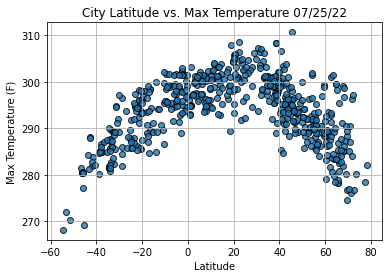

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

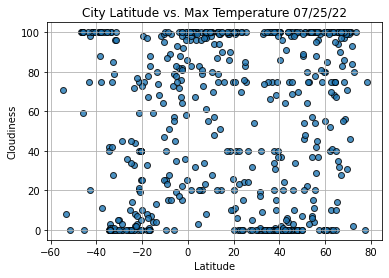

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

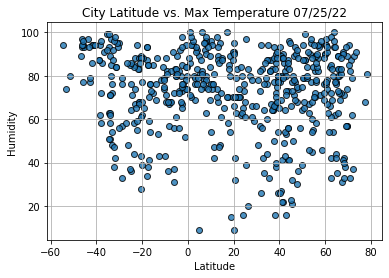

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


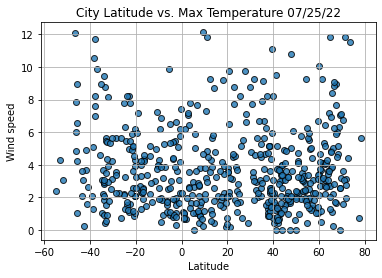

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()